#Test Single Image

**Mount Google Drive**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Set File location**

In [22]:
filepath = '/content/drive/MyDrive/model6_VGG16.keras'
Detection=load_model(filepath)

In [23]:
test_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"

**Set Parameters**

In [24]:
img_size=224     #Vgg16 input layer size
batch_size=33
num_class=12   #Number of classification

**Load all images from directory**

In [25]:

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(test_location,
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)


Found 2748 images belonging to 12 classes.


In [10]:
classes=train_generator.class_indices
classes

{'1Hundredfake': 0,
 '1Hundrednote': 1,
 '2Hundrednote': 2,
 '5Hundrednote': 3,
 'Fiftynote': 4,
 'Tennote': 5,
 'Twentynote': 6,
 'fake_10': 7,
 'fake_20': 8,
 'fake_200': 9,
 'fake_50': 10,
 'fake_500': 11}

In [11]:
category=[]
for i in classes:
          category.append(i)

In [12]:
 category

['1Hundredfake',
 '1Hundrednote',
 '2Hundrednote',
 '5Hundrednote',
 'Fiftynote',
 'Tennote',
 'Twentynote',
 'fake_10',
 'fake_20',
 'fake_200',
 'fake_50',
 'fake_500']

**set Query Image path**

In [13]:
file_name = '/content/drive/MyDrive/hi.jpg'

**Load the Query Image**

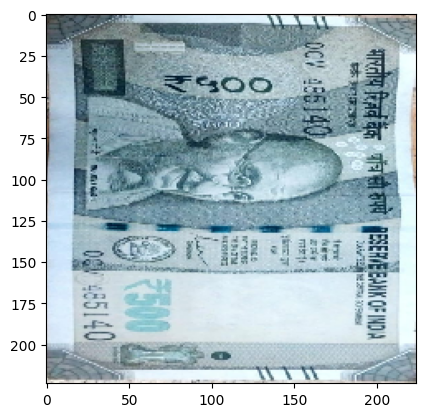

In [14]:
test_img=image.load_img(file_name,target_size=(img_size,img_size))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)

**Predict the Query Image**

In [16]:

result=Detection.predict(test_img)
a=result.argmax()
classes=train_generator.class_indices

category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
          if(i==a):
              output=category[i]
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
fake_200


In [17]:
a

np.int64(9)

In [18]:
a=result.argmax()
a
result

array([[0.000000e+00, 6.851635e-24, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32)

In [19]:
result.argmax()

np.int64(9)